# Data mining project

## Willson Melo Merchan

## Profesor:
## Luis Francisco Lopez Castro


#### Problem:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#get the data

df=pd.read_csv("Data/Data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 1.
##  Preliminary analysis of the data. Use graphs and descriptive statistics. Focus on finding characteristics that help to separate data by class

After reviewing the values of the data frame we can understand that data can be separated by classes of a binary value from the following columns
    * blue
    * dual_sim
    * four_g
    * three_g
    * touch_screen
    * wifi
    
In addition there is a special column where you can classify on the basis of cost range, where 0 is a low cost 3 is a very high cost
    * price_range
consideramos la del rango de precio es la que nos permitirá clasificar los dispositivos de una mejor manera, y para ello la usaremos de referencia con las demas caracteristicas.
 

In [3]:
# import library
import matplotlib.pyplot as plt
df["blue"].value_counts()
#using df["blue"].value_counts() we can get a count of the amount of 1's and 0's in the "blue" column
#we can see that there are 1010 without bluetooth and 990 with bluetooth

0    1010
1     990
Name: blue, dtype: int64

In [4]:
# Now let's do the same for each of the variables defined above
# but let's just count the 1's in each of these characteristics 
characteristics  = ["blue","dual_sim","four_g","three_g","touch_screen","wifi"]
values = []
for c in characteristics:
    values.append(df[c].value_counts()[1])

values
# we can see that characteristic three_g is the largest

[990, 1019, 1043, 1523, 1006, 1014]

<BarContainer object of 6 artists>

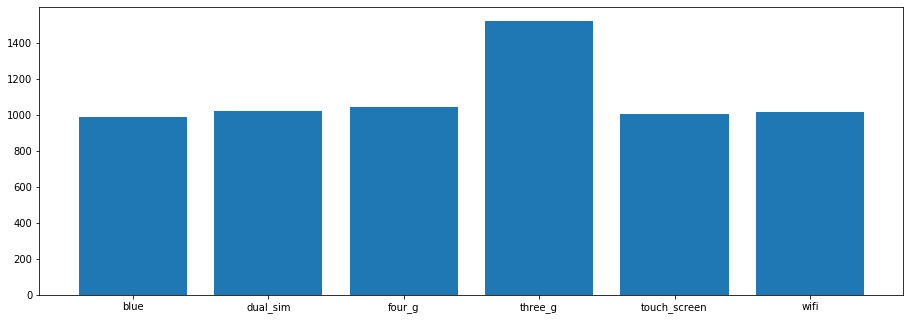

In [5]:
# graph the values per characteristic 
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(characteristics,values)

#### Now let's do the same thing but just for the price range column

In [6]:
values = df["price_range"].value_counts()
# flip the list
values[::-1]

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

<BarContainer object of 4 artists>

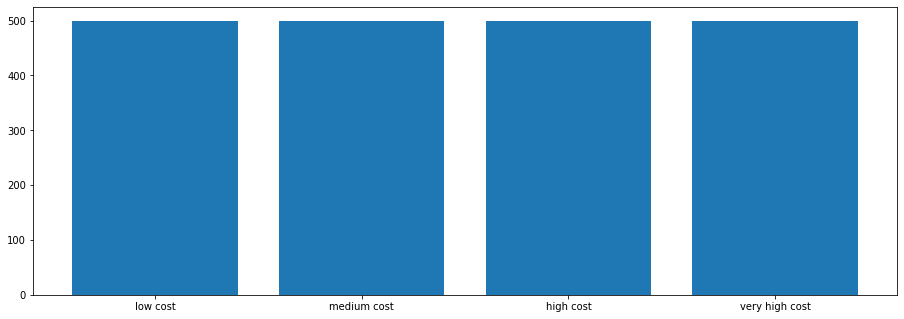

In [7]:
description = ["low cost","medium cost","high cost","very high cost"]    
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)
# we can see the amount of cell phones from low cost to long cost are perfectly balanced

### Bluetooth

###  We count for each price range how many cell phones have bluetooth

In [8]:
values = [0,0,0,0]
# iterate the dataframe
for i,row in df.iterrows():
    if(row["blue"] == 1):
        priceRange = int(row["price_range"])
        values[priceRange] += 1

values

[243, 245, 243, 259]

<BarContainer object of 4 artists>

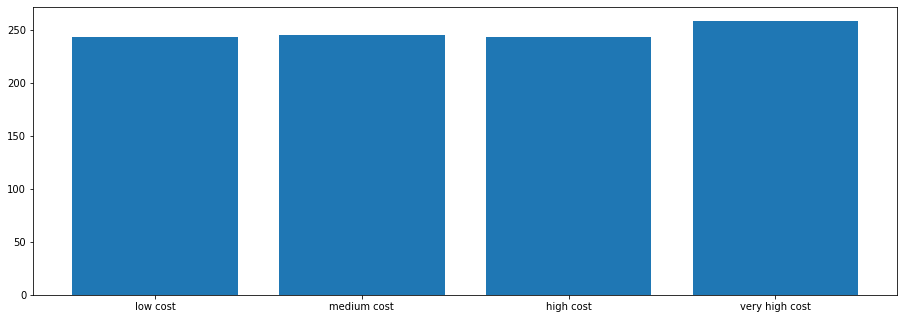

In [9]:

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)

### Double sim card

### We count for each price range how many cell phones have double sim card

In [10]:
values = [0,0,0,0]
# iterate the dataframe
for i,row in df.iterrows():
    if(row["dual_sim"] == 1):
        priceRange = int(row["price_range"])
        values[priceRange] += 1

values

[250, 255, 249, 265]

<BarContainer object of 4 artists>

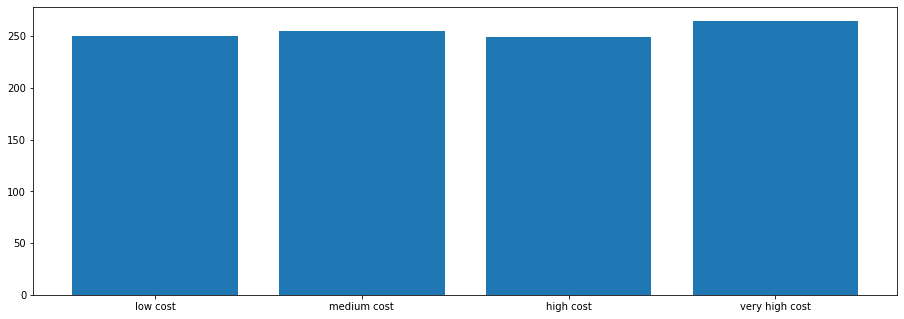

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)

### 4G technology

### We count for each price range how many cell phones have 4G technology


In [12]:
values = [0,0,0,0]
# iterate the dataframe
for i,row in df.iterrows():
    if(row["four_g"] == 1):
        priceRange = int(row["price_range"])
        values[priceRange] += 1

values

[259, 262, 247, 275]

<BarContainer object of 4 artists>

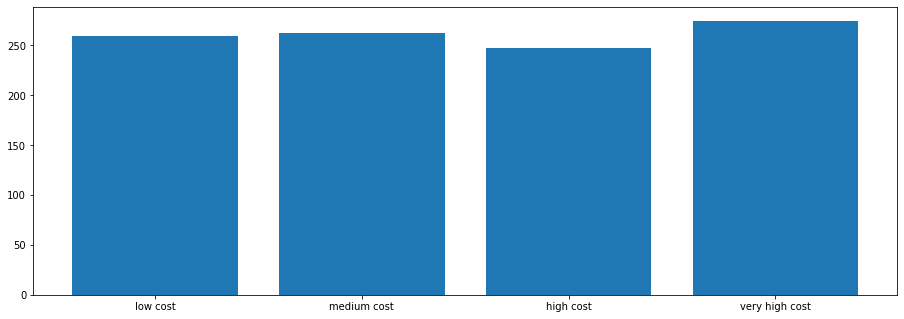

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)

### 3G technology

### We count for each price range how many cell phones have 3G technology


In [14]:
values = [0,0,0,0]
# iterate the dataframe
for i,row in df.iterrows():
    if(row["three_g"] == 1):
        priceRange = int(row["price_range"])
        values[priceRange] += 1

values

[373, 378, 387, 385]

<BarContainer object of 4 artists>

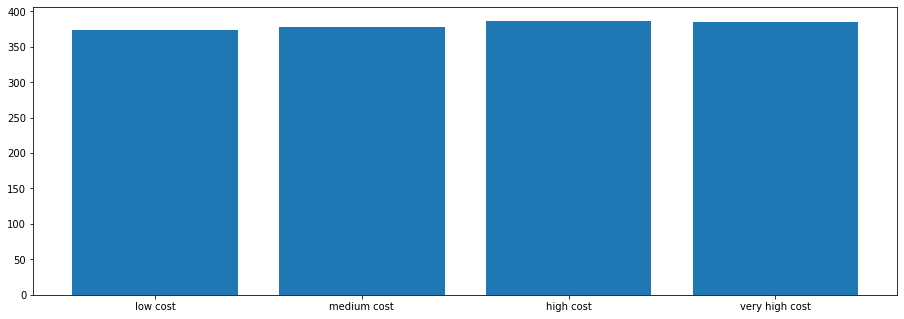

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)

### Touch screen

### we count for each price range how many cell phones have touch screen

In [16]:
values = [0,0,0,0]
# iterate the dataframe
for i,row in df.iterrows():
    if(row["touch_screen"] == 1):
        priceRange = int(row["price_range"])
        values[priceRange] += 1

values

[262, 261, 235, 248]

<BarContainer object of 4 artists>

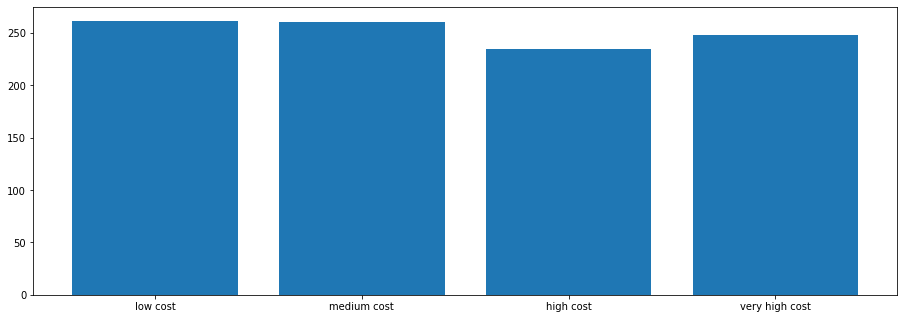

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)

### WI-fi

### we count for each price range how many cell phones have wifi


In [18]:
values = [0,0,0,0]
# iterate the dataframe
for i,row in df.iterrows():
    if(row["wifi"] == 1):
        priceRange = int(row["price_range"])
        values[priceRange] += 1

values

[248, 252, 252, 262]

<BarContainer object of 4 artists>

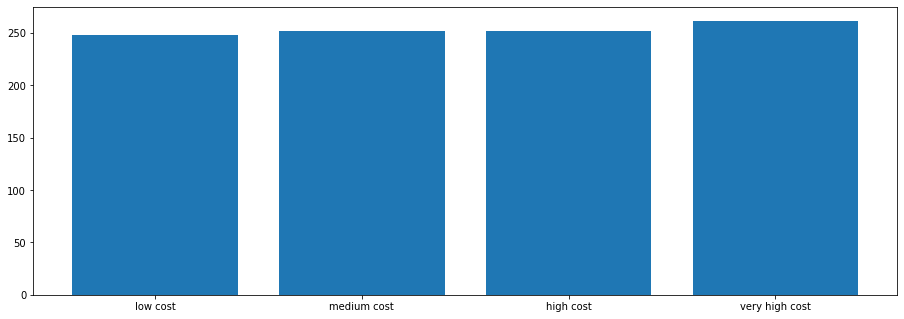

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(description,values)

### For each characteristic the values are quite similar, we could not find a point where the difference is noticeable, we will try with the other characteristics 